In [1]:
# Import Basics Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import bz2

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read in training data from CSV
df_train = pd.read_csv('./Twitter/twitter_training.csv')
df_train.columns =['TweetId', 'Entity', 'Sentiment', 'Tweet']
df_train

,TweetId,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
# Downsample the training set to ~20,000 samples
percentage = 0.30
df_train_downsampled = df_train.sample(frac=percentage,random_state=0)
df_train_downsampled

,TweetId,Entity,Sentiment,Tweet
28696,537,ApexLegends,Neutral,"is, why would it fucking matter if two games h..."
51606,10459,RedDeadRedemption(RDR),Neutral,This looks like the opening scene of Red Dead ...
19463,12533,WorldOfCraft,Neutral,I always get sad in the troll starter area whe...
26251,907,AssassinsCreed,Positive,Brotherhood Clothing
55871,2391,CallOfDuty,Negative,@CallofDuty @CallofDutyUK firstly you need to ...
...,...,...,...,...
47167,5693,HomeDepot,Positive,Stop the bleeding
69628,3929,Cyberpunk2077,Positive,This looks pretty clean!
5286,111,Amazon,Neutral,@ liamwhitehouse1 Thank you for participating ...
56961,11372,TomClancysRainbowSix,Neutral,No We both well know you probably saw this twe...


In [4]:
# Read in testing data from CSV
df_test = pd.read_csv('./Twitter/twitter_validation.csv')
df_test.columns =['TweetId', 'Entity', 'Sentiment', 'Tweet']
df_test

,TweetId,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
df_train_downsampled["Sentiment"].replace({"Positive": 1, "Negative": 0, "Neutral":2, "Irrelevant":2}, inplace=True)
df_test["Sentiment"].replace({"Positive": 1, "Negative": 0, "Neutral":2, "Irrelevant":2}, inplace=True)
df_train_downsampled

,TweetId,Entity,Sentiment,Tweet
28696,537,ApexLegends,2,"is, why would it fucking matter if two games h..."
51606,10459,RedDeadRedemption(RDR),2,This looks like the opening scene of Red Dead ...
19463,12533,WorldOfCraft,2,I always get sad in the troll starter area whe...
26251,907,AssassinsCreed,1,Brotherhood Clothing
55871,2391,CallOfDuty,0,@CallofDuty @CallofDutyUK firstly you need to ...
...,...,...,...,...
47167,5693,HomeDepot,1,Stop the bleeding
69628,3929,Cyberpunk2077,1,This looks pretty clean!
5286,111,Amazon,2,@ liamwhitehouse1 Thank you for participating ...
56961,11372,TomClancysRainbowSix,2,No We both well know you probably saw this twe...


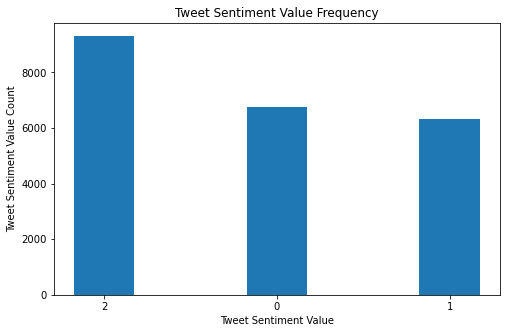

In [6]:
# Visual of Training Samples' Outcomes - Even Distribution of Outcomes
sent_count = df_train_downsampled['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
w = 0.35  
plt.bar(x=np.arange(len(sent_count)), height=sent_count, width = w)

plt.xticks(np.arange(len(sent_count)), sent_count.index.tolist())
plt.xlabel('Tweet Sentiment Value')
plt.ylabel('Tweet Sentiment Value Count')
plt.title('Tweet Sentiment Value Frequency')

plt.show()

In [7]:
# Eliminate Title Feature - Train
TrainXdf = df_train_downsampled['Tweet']
TrainYdf = df_train_downsampled['Sentiment']
[TrainXdf, TrainYdf]

[28696    is, why would it fucking matter if two games h...
 51606    This looks like the opening scene of Red Dead ...
 19463    I always get sad in the troll starter area whe...
 26251                                 Brotherhood Clothing
 55871    @CallofDuty @CallofDutyUK firstly you need to ...
                                ...                        
 47167                                    Stop the bleeding
 69628                             This looks pretty clean!
 5286     @ liamwhitehouse1 Thank you for participating ...
 56961    No We both well know you probably saw this twe...
 33316    only stop by as say hi for their 1st LIVE stre...
 Name: Tweet, Length: 22404, dtype: object,
 28696    2
 51606    2
 19463    2
 26251    1
 55871    0
         ..
 47167    1
 69628    1
 5286     2
 56961    2
 33316    2
 Name: Sentiment, Length: 22404, dtype: int64]

In [8]:
# Eliminate Title Feature - Test
TestXdf = df_test['Tweet']
TestYdf = df_test['Sentiment']
[TestXdf, TestYdf]

[0      BBC News - Amazon boss Jeff Bezos rejects clai...
 1      @Microsoft Why do I pay for WORD when it funct...
 2      CSGO matchmaking is so full of closet hacking,...
 3      Now the President is slapping Americans in the...
 4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                              ...                        
 994    ⭐️ Toronto is the arts and culture capital of ...
 995    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
 996    Today sucked so it’s time to drink wine n play...
 997    Bought a fraction of Microsoft today. Small wins.
 998    Johnson & Johnson to stop selling talc baby po...
 Name: Tweet, Length: 999, dtype: object,
 0      2
 1      0
 2      0
 3      2
 4      0
       ..
 994    2
 995    2
 996    1
 997    1
 998    2
 Name: Sentiment, Length: 999, dtype: int64]

In [9]:
if ( not TrainXdf.isnull().values.any() and not TrainYdf.isnull().values.any() ):
    print("Training set has no NULL values.")
else:
    if ( TrainXdf.isnull().values.any() ):
        null_tweets = df_train_downsampled[df_train_downsampled['Tweet'].isnull()].index.tolist()
        print("Null Tweets exist in Training Set. Dropping", len(null_tweets), "rows")
        df_train_downsampled.dropna(subset = ["Tweet"], inplace=True)
        TrainXdf = df_train_downsampled["Tweet"]
        TrainYdf = df_train_downsampled["Sentiment"]
        print("Null values Exist In X,Y Training Set:", TrainXdf.isnull().values.any(), TrainYdf.isnull().values.any())
    if ( TrainYdf.isnull().values.any() ):
        null_sent = df_train_downsampled[df_train_downsampled['Sentiment'].isnull()].index.tolist()
        print("Null Sentiments exist in Training Set. Dropping", len(null_sent), "rows")
        df_train_downsampled.dropna(subset = ["Sentiment"], inplace=True)
        TrainXdf = df_train_downsampled["Tweet"]
        TrainYdf = df_train_downsampled["Sentiment"]
        print("Null values Exist:", TrainXdf.isnull().values.any(), TrainYdf.isnull().values.any())
if ( not TestXdf.isnull().values.any() and not TestYdf.isnull().values.any() ):
    print("Testing set has no NULL values.")

Null Tweets exist in Training Set. Dropping 205 rows
Null values Exist In X,Y Training Set: False False
Testing set has no NULL values.


In [10]:
# "One-Hot Encoding" Function that converts the Tweets to Numerical Arrays
def oneHotEnc(SamplesArray):
    X_ = []
    for tweet in SamplesArray:
            token_item = []
            for letter in tweet.lower():
                # print(letter)
                if ord(letter) >= ord('a') and ord(letter) <= ord('z'):
                    token_item.append(ord(letter) - ord('a') + 11)
                elif ord(letter) >= ord('0') and ord(letter) <= ord('9'):
                    token_item.append(ord(letter) - ord('0') + 1)
                elif letter == ' ':
                    token_item.append(-1)
                else:
                    pass
                    #token_item.append(0)
            X_.append(token_item)
    return X_

# Get Finalized Training and Testing Sets
TrainXdf = oneHotEnc(TrainXdf)
TestXdf = oneHotEnc(TestXdf)

TrainYdf=np.array(TrainYdf)
TestYdf=np.array(TestYdf)

TrainXdf

[[19,
  29,
  -1,
  33,
  18,
  35,
  -1,
  33,
  25,
  31,
  22,
  14,
  -1,
  19,
  30,
  -1,
  16,
  31,
  13,
  21,
  19,
  24,
  17,
  -1,
  23,
  11,
  30,
  30,
  15,
  28,
  -1,
  19,
  16,
  -1,
  30,
  33,
  25,
  -1,
  17,
  11,
  23,
  15,
  29,
  -1,
  18,
  11,
  32,
  15,
  -1,
  15,
  34,
  11,
  13,
  30,
  -1,
  29,
  11,
  23,
  15,
  -1,
  30,
  18,
  19,
  24,
  17,
  -1,
  19,
  24,
  -1,
  19,
  30,
  -1,
  33,
  18,
  35,
  -1,
  33,
  25,
  31,
  22,
  14,
  -1,
  11,
  24,
  35,
  25,
  24,
  15,
  -1,
  13,
  11,
  28,
  15],
 [30,
  18,
  19,
  29,
  -1,
  22,
  25,
  25,
  21,
  29,
  -1,
  22,
  19,
  21,
  15,
  -1,
  30,
  18,
  15,
  -1,
  25,
  26,
  15,
  24,
  19,
  24,
  17,
  -1,
  29,
  13,
  15,
  24,
  15,
  -1,
  25,
  16,
  -1,
  28,
  15,
  14,
  -1,
  14,
  15,
  11,
  14,
  -1,
  28,
  15,
  14,
  15,
  23,
  26,
  30,
  19,
  25,
  24,
  -1,
  3],
 [19,
  -1,
  11,
  22,
  33,
  11,
  35,
  29,
  -1,
  17,
  15,
  30,
  -1,
  29,
  11,
  1

In [11]:
# Item Memory Generation Function
def itemMemGen(dim=10000, num_char=37):
    dictMem = np.random.randint(2, size=(num_char, dim), dtype='int32')
    dictMem[dictMem == 0] = -1
    return dictMem

# Hyperparamaters
HV_dim = 10000
num_supported_chars = 37

# Item Memory Generation
itemMem = itemMemGen(dim=HV_dim, num_char=num_supported_chars)

In [12]:
# Function for Encoding a Tweet into a HV
def encode(tweet, itemMem, HV_dim=10000, n_gram_len=3):
    tweet_HV = np.zeros(HV_dim, dtype='int32')

    for ngram_start in range(0, len(tweet)-n_gram_len, 3):
        roll_value=n_gram_len
        for j in range(n_gram_len):
            letterHV = itemMem[tweet[ngram_start + j]]

            if (j==0):
                product = letterHV
            elif (j==n_gram_len-1):
                product = product * np.roll(letterHV, roll_value)
                tweet_HV = np.add(tweet_HV, product)
            else:
                product = product * np.roll(letterHV, roll_value)
                
            roll_value = roll_value - 1

    HV_avg = np.average(tweet_HV)
    tweet_HV[tweet_HV > HV_avg] = 1
    tweet_HV[tweet_HV < HV_avg] = -1
    tweet_HV[tweet_HV == HV_avg] = 0
    return tweet_HV

# HDC Training Function Creates Associative Memory
def train(X, Y, itemMem, HV_dim, sent_count, n_gram_len):
    assocMem = np.zeros((sent_count, HV_dim), dtype='int32')
    tweet_idx = 0
    
    for tweet in X:
        review_HV = encode(tweet, itemMem, HV_dim, n_gram_len)
        assocMem[Y[tweet_idx]] = np.add(assocMem[Y[tweet_idx]], review_HV)
        tweet_idx += 1

    return assocMem

n_gram_len = 3
assocMem = train(TrainXdf, TrainYdf, itemMem, HV_dim, len(sent_count), n_gram_len)
assocMem

array([[  229,  -223, -1753, ...,  1492, -2682,   279],
       [   22,  -450,  -998, ...,  1507, -2176,   401],
       [   29,    46, -1726, ...,  2146, -3579,   515]])

In [13]:
# Function Compares Input HV to Class HVs and Returns the Predicted Class
def get_prediction(assocMem, inputHV):
    pred = assocMem[0]
    maximum = np.NINF

    for index in range(len(assocMem)):
        similarity = cosine_similarity([inputHV, assocMem[index]])[0][1]  
        if (similarity > maximum):
            pred = index
            maximum = similarity

    return pred

# Function Tests the Model and Return Accuracy of Model
def test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf):
    correct_count = 0

    for index in range(len(TestXdf)):
        prediction = get_prediction(assocMem, encode(TestXdf[index], itemMem, HV_dim, n_gram_len))
        if (TestYdf[index] == prediction):
            correct_count += 1
            
    accuracy = (correct_count / len(TestYdf)) * 100
    return accuracy

# One-Shot Training Results
one_shot_accuracy=test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf)
print("One Shot Accuracy: ", one_shot_accuracy)

One Shot Accuracy:  56.25625625625625


In [14]:
def retrain(X, Y, itemMem, assocMem, HV_dim, n_gram_len, alpha):
    tweet_index = 0
    print("start")
    for tweet in X:
        tweet_HV = encode(tweet, itemMem, HV_dim, n_gram_len)
        prediction = get_prediction(assocMem, tweet_HV)
        if prediction != Y[tweet_index]:
            assocMem[Y[tweet_index]] = np.add(assocMem[Y[tweet_index]], alpha * tweet_HV)
            assocMem[prediction] = np.subtract(assocMem[prediction], alpha * tweet_HV)
        tweet_index += 1
        if(tweet_index%10000 == 0):
            print("still going", tweet_index)
    return assocMem

# Re-Train Model
num_epochs = 20
print('-------- Retraining Model: ', num_epochs, ' Epochs --------')
for epoch in range(num_epochs):
    assocMem = retrain(TrainXdf, TrainYdf, itemMem, assocMem, HV_dim, n_gram_len, alpha = num_epochs - epoch)
    acc = test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf)
    print('Epoch ', (epoch+1), ': ', acc)

-------- Retraining Model:  20  Epochs --------
start
still going 10000
still going 20000
Epoch  1 :  55.75575575575576
start
still going 10000
still going 20000
Epoch  2 :  56.15615615615616
start
still going 10000
still going 20000
Epoch  3 :  56.25625625625625
start


KeyboardInterrupt: 